In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# Get rid of warnings (!)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
from IPython.display import clear_output

# Import all the deep learning stuff
# import tensorflow as tf
# import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split

# Import all the math and analysis stuff
import numpy as np
import matplotlib.pyplot as plt
import math

# Import models
from training.LSTM import LSTM
from training.ConvLSTM import ConvLSTM

In [3]:
# Import script for loading gestures
from datatools.data_process import load_preprocessed_data_split_on_candidate, load_candidate_map, divide_cand_split

In [4]:
import evaluation.convertion as evaluate
from evaluation.utils import get_timestr
from training.ConvLSTM import ConvLSTM_horizontal
from training.ConvLSTM import ConvLSTM


In [5]:

def size_evaluation_proceidure(training_data, model_builder, model_name, epochs):
    # Get data from tuple data
    X_train, X_test, y_train, y_test = training_data 

    model = model_builder()

    # Do training
    history = model.fit(
        X_train, 
        y_train, 
        batch_size=32,
        validation_split=0.1,
        shuffle=True, 
        epochs=epochs,
        verbose = 1
    )

    # Generate result string
    test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test), verbose=2)
    res_string = f"Test loss: {test_loss}, Test acc: {test_acc}"

    # Save model to disk.
    model.save(f"./output/models/tf/{model_name}_{get_timestr()}.h5")
    clear_output()
    
    # Convertion and size
    file_name = evaluate.convert_and_quantize(model, X_train, model_name = model_name)
    clear_output()

    with open(f"{file_name}.txt", 'a') as file:
        file.write(res_string)

# Horizontal kernels (3, 1)

In [6]:
EPOCHS = 200
LEARNING_RATE = 0.00005

models_to_eval_horizontal = [
    ("ConvLSTM_one_conv_layers_horizontal_kernel_lstm_32units_framesize_5", lambda: ConvLSTM_horizontal.get_model_one_layer_framesize_5(units=32, lr=LEARNING_RATE)),
    ("ConvLSTM_one_conv_layers_horizontal_kernel_lstm_64units_framesize_5", lambda: ConvLSTM_horizontal.get_model_one_layer_framesize_5(units=64, lr=LEARNING_RATE)),
    ("ConvLSTM_one_conv_layers_horizontal_kernel_lstm_128units_framesize_5", lambda:ConvLSTM_horizontal.get_model_one_layer_framesize_5(units=128, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_layers_horizontal_kernel_lstm_32units_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_framesize_5(units=32, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_layers_horizontal_kernel_lstm_64units_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_framesize_5(units=64, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_layers_horizontal_kernel_lstm_128units_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_framesize_5(units=128, lr=LEARNING_RATE)),
    ("expr_2_ConvLSTM_complex_horizontal_kernel_lstm_32units_framesize_5", lambda: ConvLSTM_horizontal.complex_model(units=32, lr=LEARNING_RATE)),
    ("expr_2_ConvLSTM_complex_horizontal_kernel_lstm_64units_framesize_5", lambda: ConvLSTM_horizontal.complex_model(units=64, lr=LEARNING_RATE)),
    ("expr_2_ConvLSTM_complex_horizontal_kernel_lstm_128units_framesize_5", lambda: ConvLSTM_horizontal.complex_model(units=128, lr=LEARNING_RATE)),
]

In [38]:
from training.ConvLSTM import ConvLSTM

# Load data
X_train, X_test, y_train, y_test, enc = load_preprocessed_data_split_on_candidate(
    log=True,
    divide_into_frames=True,
    normalize_per_channel=True
)
training_data = (X_train, X_test, y_train, y_test)

# Do evalutaion proceidure
for model_name, model_builder in models_to_eval_horizontal:
    print(f"Evaluation of model: {model_name}")
    size_evaluation_proceidure(training_data, model_builder=model_builder, model_name = model_name, epochs = EPOCHS)


# Square kernels

In [20]:
EPOCHS = 200
LEARNING_RATE = 0.00005

models_to_eval_square = [
    ("ConvLSTM_one_conv_layer_lstm_32units_framesize_5", lambda: ConvLSTM.get_model_one_conv_framesize_5(units=32, lr=LEARNING_RATE)),
    ("ConvLSTM_one_conv_layer_lstm_64units_framesize_5", lambda: ConvLSTM.get_model_one_conv_framesize_5(units=64, lr=LEARNING_RATE)),
    ("ConvLSTM_one_conv_layer_lstm_128units_framesize_5", lambda: ConvLSTM.get_model_one_conv_framesize_5(units=128, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_layers_lstm_32units_framesize_5", lambda: ConvLSTM.get_model_two_conv_framesize_5(units=32, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_layers_lstm_64units_framesize_5", lambda: ConvLSTM.get_model_two_conv_framesize_5(units=64, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_layers_lstm_128units_framesize_5", lambda: ConvLSTM.get_model_two_conv_framesize_5(units=128, lr=LEARNING_RATE))
]
 

In [40]:
# Load data
X_train, X_test, y_train, y_test, enc = load_preprocessed_data_split_on_candidate(
    log=True,
    divide_into_frames=True,
    normalize_per_channel=True
)
training_data = (X_train, X_test, y_train, y_test)

# Do evalutaion proceidure
for model_name, model_builder in models_to_eval_square:
    print(f"Evaluation of model: {model_name}")
    size_evaluation_proceidure(training_data, model_builder=model_builder, model_name = model_name, epochs = EPOCHS)


In [17]:
from training.ConvLSTM import ConvLSTM_horizontal
conv_lstm_extra_dense = [
    ("ConvLSTM_two_conv_extra_dense_layer_32lstmunits_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_extra_dense_framesize_5(units=32, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_extra_dense_layer_64lstmunits_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_extra_dense_framesize_5(units=64, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_extra_dense_layer_128lstmunits_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_extra_dense_framesize_5(units=128, lr=LEARNING_RATE)),
    ("ConvLSTM_two_conv_extra_dense_layer_256lstmunits_framesize_5", lambda: ConvLSTM_horizontal.get_model_two_layers_extra_dense_framesize_5(units=256, lr=LEARNING_RATE)),
]
models_CNN = [
    ("CNN_32units_framesize_5", lambda: CNN.get_model_framesize_5(kernels=32, lr=LEARNING_RATE)),
    ("CNN_64units_framesize_5", lambda: CNN.get_model_framesize_5(kernels=64, lr=LEARNING_RATE)),
    ("CNN_128units_framesize_5", lambda: CNN.get_model_framesize_5(kernels=128, lr=LEARNING_RATE)),
]
conv_lstm_extra_dense.extend(models_CNN)

In [21]:
print(len(conv_lstm_extra_dense))

# Load data
X_train, X_test, y_train, y_test, enc = load_preprocessed_data_split_on_candidate(
    log=True,
    divide_into_frames=True,
    normalize_per_channel=True
)
training_data = (X_train, X_test, y_train, y_test)

# Do evalutaion proceidure
for model_name, model_builder in conv_lstm_extra_dense:
    print(f"Evaluation of model: {model_name}")
    size_evaluation_proceidure(training_data, model_builder=model_builder, model_name = model_name, epochs = EPOCHS)


# RNN and GRU

In [10]:
from training.GRU import GRU
from training.RNN import RNN

RNN_models = [
    ("RNN_32_units_framesize_5", lambda: RNN.get_model_framesize_5(units=32, lr=LEARNING_RATE)),
    ("RNN_64_units_framesize_5", lambda: RNN.get_model_framesize_5(units=64, lr=LEARNING_RATE)),
    ("RNN_128_units_framesize_5", lambda: RNN.get_model_framesize_5(units=128, lr=LEARNING_RATE)),
]
models_GRU = [
    ("GRU_32units_framesize_5", lambda: GRU.get_model_framesize_5(units=32, lr=LEARNING_RATE)),
    ("GRU_64units_framesize_5", lambda: GRU.get_model_framesize_5(units=64, lr=LEARNING_RATE)),
    ("GRU_128units_framesize_5", lambda: GRU.get_model_framesize_5(units=128, lr=LEARNING_RATE)),
]
RNN_models.extend(models_GRU)

In [11]:
print(len(RNN_models))

# Load data
X_train, X_test, y_train, y_test, enc = load_preprocessed_data_split_on_candidate(
    log=True,
    divide_into_frames=True,
    normalize_per_channel=True
)
training_data = (X_train, X_test, y_train, y_test)

# Do evalutaion proceidure
for model_name, model_builder in models_GRU:
    print(f"Evaluation of model: {model_name}")
    size_evaluation_proceidure(training_data, model_builder=model_builder, model_name = model_name, epochs = EPOCHS)


# LSTM

In [13]:
from training.ConvLSTM import ConvLSTM

models_to_run_LSTM = [
    ("ConvLSTM_max_pooling_32units_framesize_5", lambda: ConvLSTM.get_model_with_pooling(units=32, lr=LEARNING_RATE)),
    ("ConvLSTM_max_pooling_64units_framesize_5", lambda: ConvLSTM.get_model_with_pooling(units=64, lr=LEARNING_RATE)),
    ("ConvLSTM_max_pooling__128units_framesize_5", lambda: ConvLSTM.get_model_with_pooling(units=128, lr=LEARNING_RATE)),
]
# Do evalutaion proceidure
for model_name, model_builder in models_to_run_LSTM:
    print(f"Evaluation of model: {model_name}")
    size_evaluation_proceidure(training_data, model_builder=model_builder, model_name = model_name, epochs = EPOCHS)



Evaluation of model: ConvLSTM_max_pooling_64units_framesize_5
Epoch 1/200


2023-06-24 15:36:55.716749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 15:36:55.718244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 15:36:55.719824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

46/47 [============================>.] - ETA: 0s - loss: 2.3165 - acc: 0.0938

2023-06-24 15:36:59.703496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 15:36:59.706216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 15:36:59.708135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

47/47 [==============================] - 5s 39ms/step - loss: 2.3159 - acc: 0.0943 - val_loss: 2.3015 - val_acc: 0.0667
Epoch 2/200
47/47 [==============================] - 1s 24ms/step - loss: 2.3110 - acc: 0.1024 - val_loss: 2.3038 - val_acc: 0.0667
Epoch 3/200
47/47 [==============================] - 1s 23ms/step - loss: 2.3059 - acc: 0.1205 - val_loss: 2.3045 - val_acc: 0.0667
Epoch 4/200
47/47 [==============================] - 1s 25ms/step - loss: 2.3069 - acc: 0.0909 - val_loss: 2.3054 - val_acc: 0.0667
Epoch 5/200
47/47 [==============================] - 1s 25ms/step - loss: 2.3016 - acc: 0.1118 - val_loss: 2.3065 - val_acc: 0.0667
Epoch 6/200
47/47 [==============================] - 1s 23ms/step - loss: 2.3061 - acc: 0.0916 - val_loss: 2.3066 - val_acc: 0.0667
Epoch 7/200
47/47 [==============================] - 1s 23ms/step - loss: 2.3042 - acc: 0.1064 - val_loss: 2.3064 - val_acc: 0.0667
Epoch 8/200
47/47 [==============================] - 1s 25ms/step - loss: 2.3031 - acc: 



# Rest

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [15]:
# Save model to disk.
from evaluation.utils import get_timestr
model.save(f"./output/models/tf/{model_name}_{get_timestr()}.h5")
clear_output()

In [39]:

model_name = "ConvLSTM_with_pooling_small_batches"

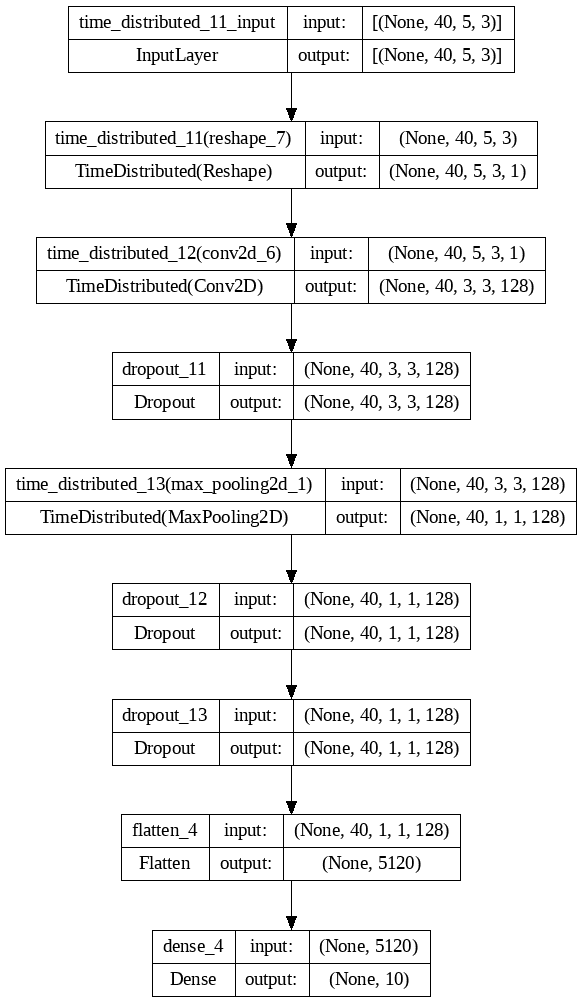

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

3/7 [===========>..................] - ETA: 0s

2023-06-22 09:36:36.912626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-22 09:36:36.916601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-22 09:36:36.918854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 1s 41ms/step


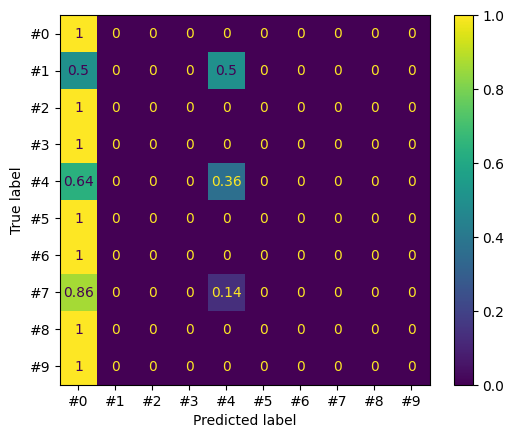

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create Confusion Matrix
predictions = np.array([f"#{i}" for i in np.argmax(model.predict(np.array(X_test)), axis=1)])
pred = predictions.reshape(-1, 1)
actual = enc.inverse_transform(y_test)
cm = confusion_matrix(actual, pred)
disp = ConfusionMatrixDisplay.from_predictions(actual, pred, normalize="true")

In [15]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test), verbose=2)
print(f"Test loss: {test_loss}, Test acc: {test_acc}")

7/7 - 0s - loss: 1.9991 - acc: 0.2273 - 384ms/epoch - 55ms/step
Test loss: 1.9991202354431152, Test acc: 0.22727273404598236


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


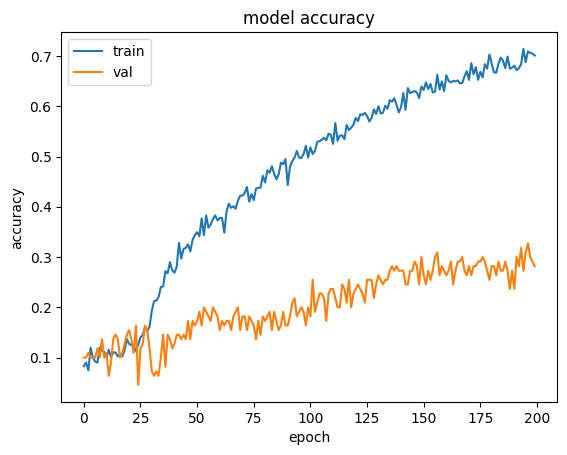

In [41]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


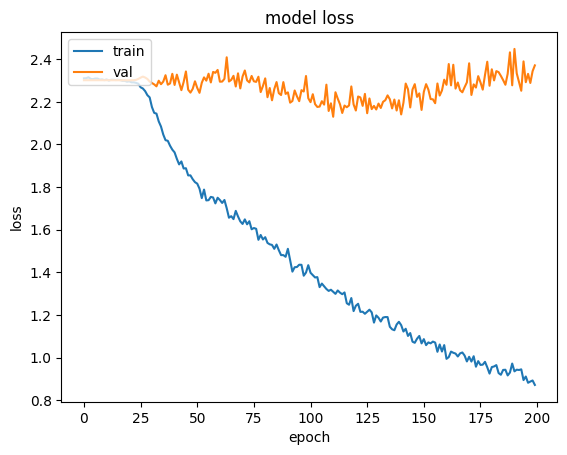

In [43]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()